### Student Information
Name: 詹睿軒

Student ID: 113062543

GitHub ID: Big-problem

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [46]:
### Begin Assignment Here

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

import helpers.data_mining_helpers as dmh

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [4]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])

---

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
#Answer here
# Access only one value can use at and iat
print(X.at[3, 'category_name']) # by label

print(X.iat[3, 2]) # by index

soc.religion.christian
soc.religion.christian


---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [18]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [19]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [20]:
# Answer here
# For {'NaN', 'None', ''}, python consider them as strings, so the  results are False
# As for {np.nan, , None}, they are considered as missing value, so the results are True

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [42]:
X_sample = X.sample(n=1000) #random state

X_sample

,text,category,category_name
696,From: lm001@rrz.Uni-Koeln.DE (Erwin H. Keeve) ...,1,comp.graphics
2173,From: reedr@cgsvax.claremont.edu Subject: Re: ...,3,soc.religion.christian
494,From: alvin@spot.Colorado.EDU (Kenneth Alvin) ...,3,soc.religion.christian
2096,From: joel@cs.mcgill.ca (Joel MALARD) Subject:...,2,sci.med
1014,From: mmatusev@radford.vak12ed.edu (Melissa N....,2,sci.med
...,...,...,...
630,From: graeme@labtam.labtam.oz.au (Graeme Gill)...,1,comp.graphics
818,Subject: Re: Contradictions From: kmr4@po.CWRU...,0,alt.atheism
671,From: lindae@netcom.com Subject: Re: MORBUS ME...,2,sci.med
2131,From: dpw@sei.cmu.edu (David Wood) Subject: Re...,0,alt.atheism


In [ ]:
# Answer here
# After X.sample(n=1000), we will randomly get 1000 records of X. The results are random and shuffled. The index stays the same and doesn't re-index from 0 to 999

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

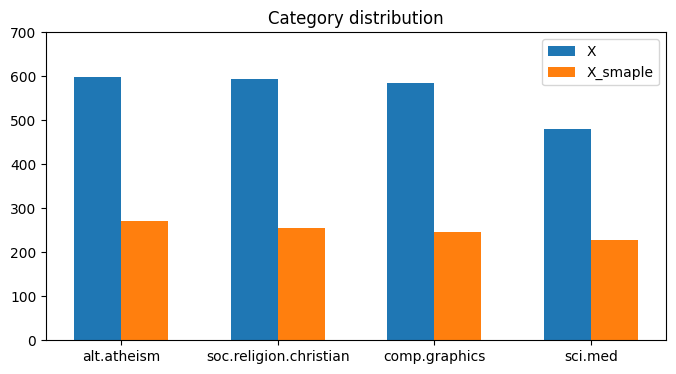

In [91]:
plt.figure(figsize=(8, 4))
l1, l2, l3 = [0,1,2,3], [0.3,1.3,2.3,3.3], [0.15,1.15,2.15,3.15]
plt.bar(l1, X.category_name.value_counts(), 0.3, label = 'X')
plt.bar(l2, X_sample.category_name.value_counts(), 0.3, label = 'X_smaple')

plt.title('Category distribution')
plt.xticks(ticks=l3, labels=categories, rotation=0, ha='center')
plt.ylim(0, 700)
plt.legend()

plt.show()